In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(name):
   plt.figure(figsize=(12,12))
   plt.imshow(name)
   plt.axis('off')
   plt.show()

Read image

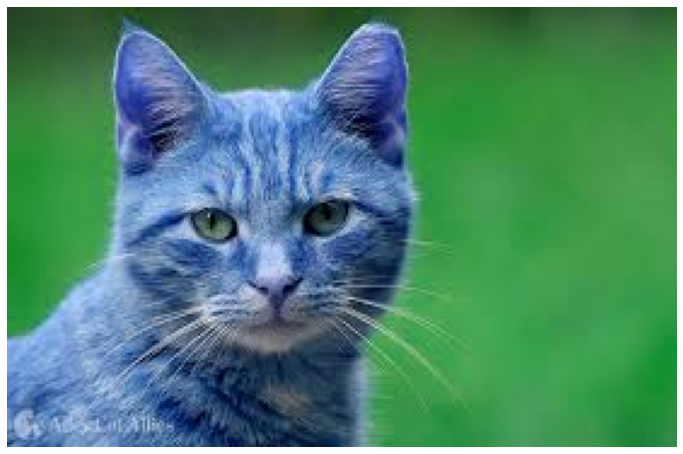

In [3]:
img = cv.imread('Cat.jpg')
#cv.imshow('What',img) # This can't do in colab
show(img)

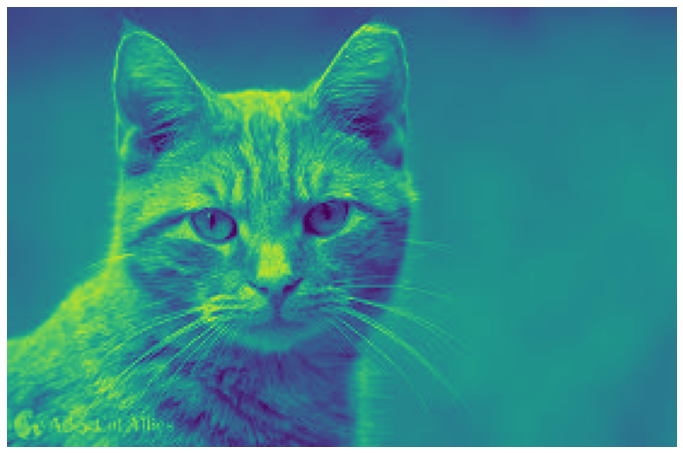

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#plt.show(gray)
show(gray)

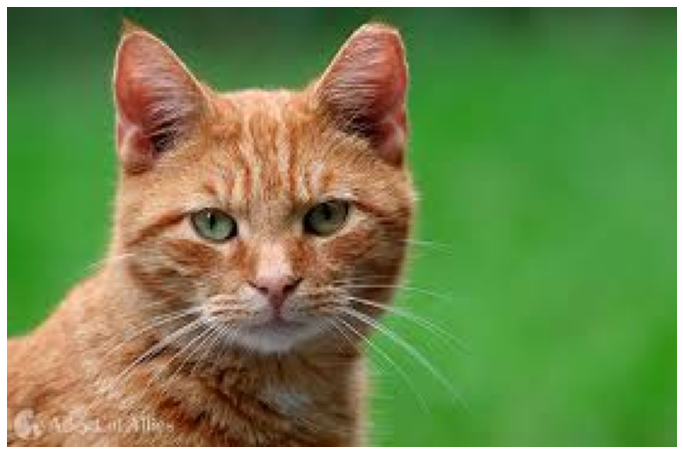

In [5]:
original=cv.cvtColor(img, cv.COLOR_BGR2RGB)
show(original)

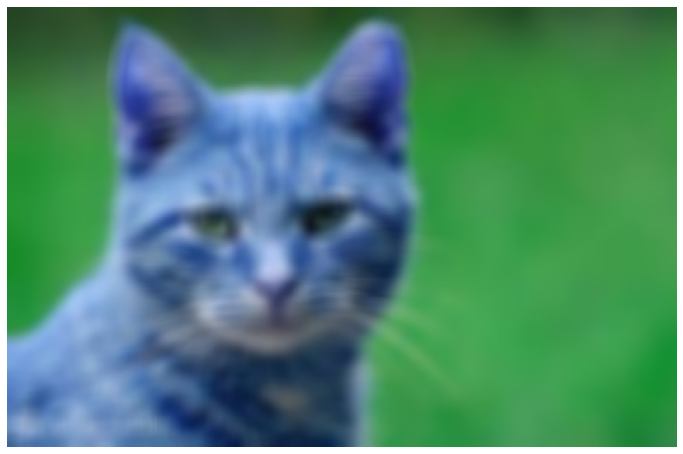

In [6]:
blur=cv.GaussianBlur(img,(7,7), cv.BORDER_DEFAULT)
show(blur)

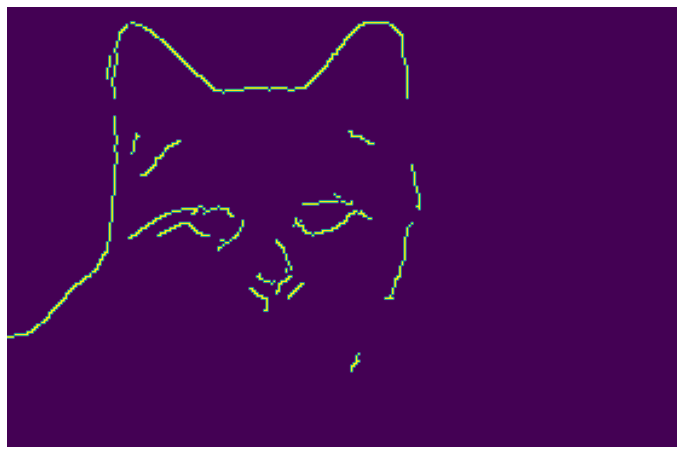

In [7]:
#Edge Cascade
canny=cv.Canny(blur, 125, 175)
show(canny)

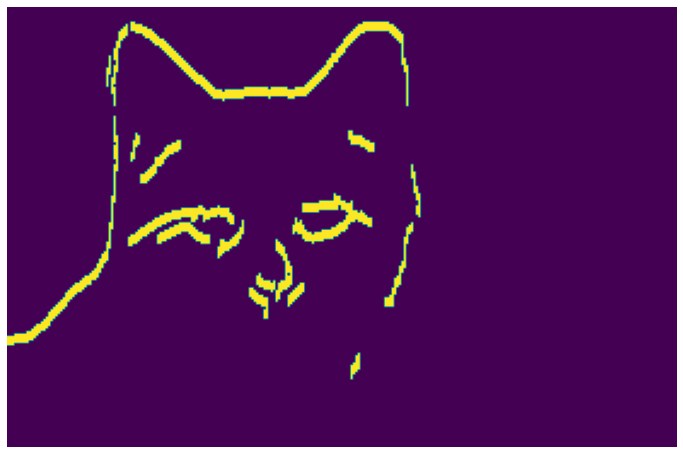

In [8]:
#Dialating Image
dilated=cv.dilate(canny, (7,7), iterations=3)
show(dilated)

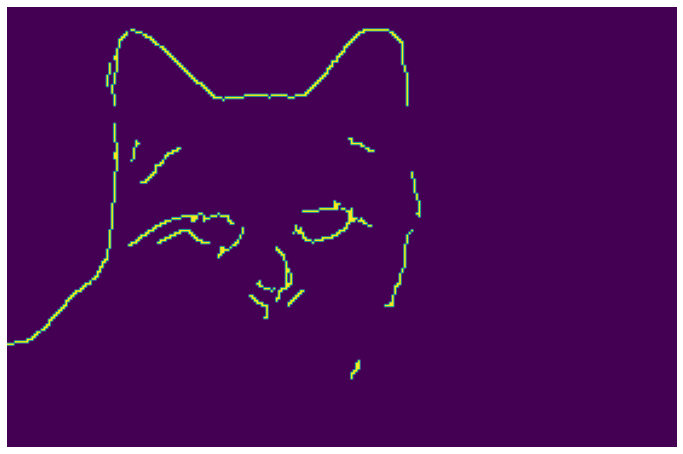

In [9]:
#Eroding
eroded= cv.erode(dilated, (7,7), iterations=3)
show(eroded)

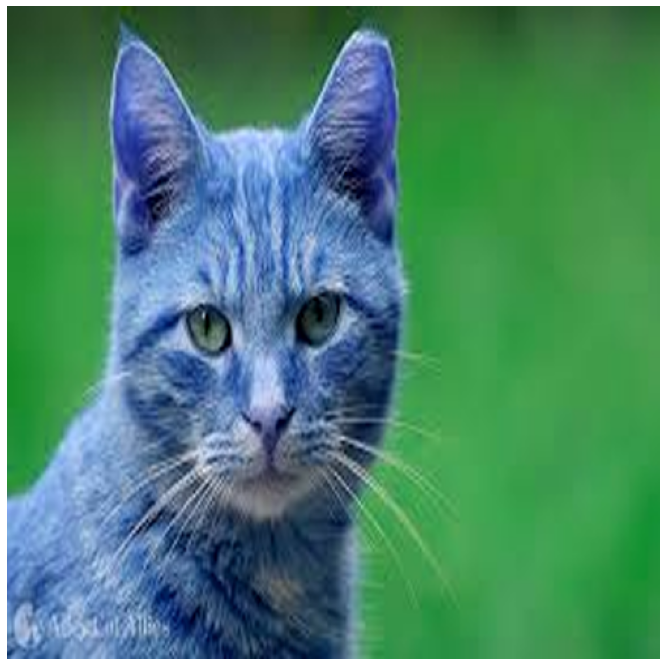

In [10]:
#Resize
resized=cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)
show(resized)

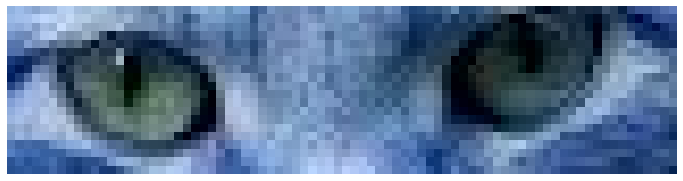

In [11]:
#Cropping
cropped=img[80:100, 70:150]
show(cropped)

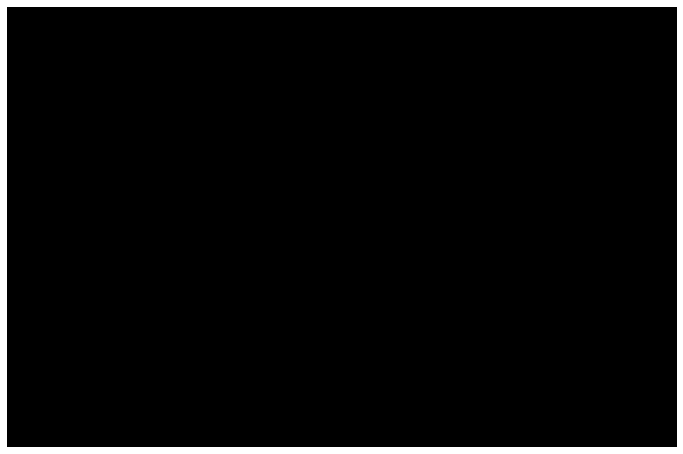

In [12]:
blank=np.zeros(img.shape, dtype= 'uint8')
show(blank)

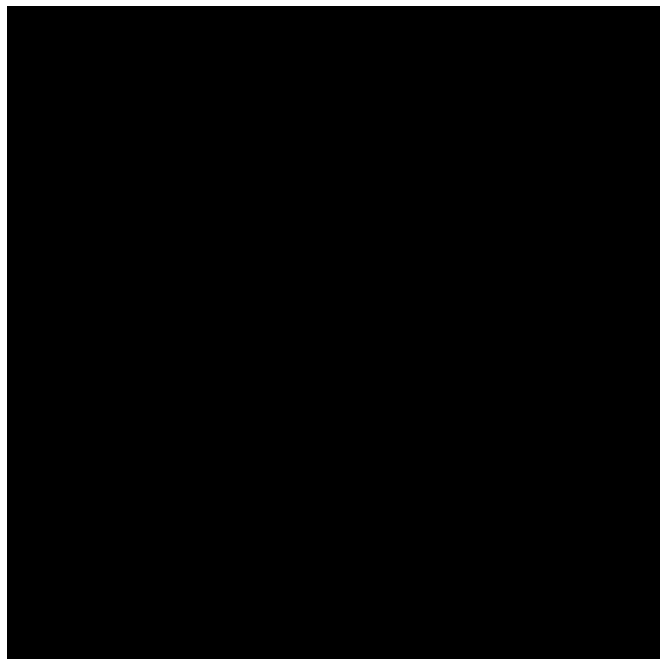

In [13]:
blank2 = np.zeros((500, 500, 3), dtype= 'uint8')
show(blank2)

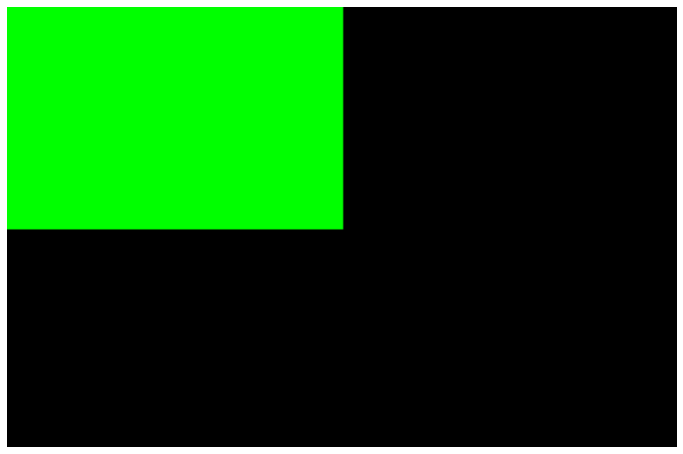

In [14]:
#Draw Rectangle
rectangle=cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1)
show(rectangle)

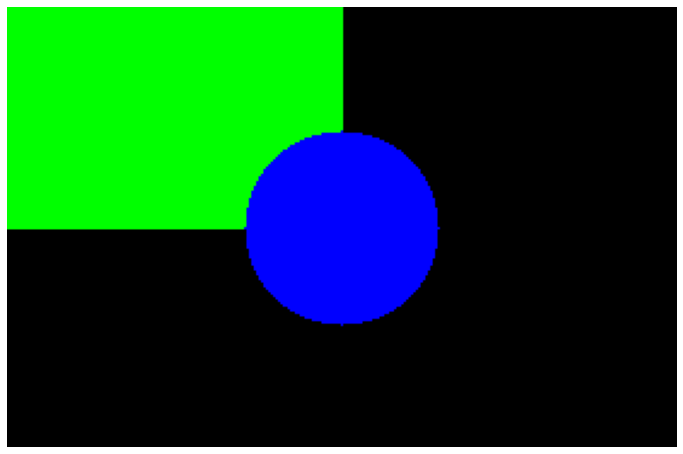

In [15]:
#draw_circle
circle = cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
show(circle)

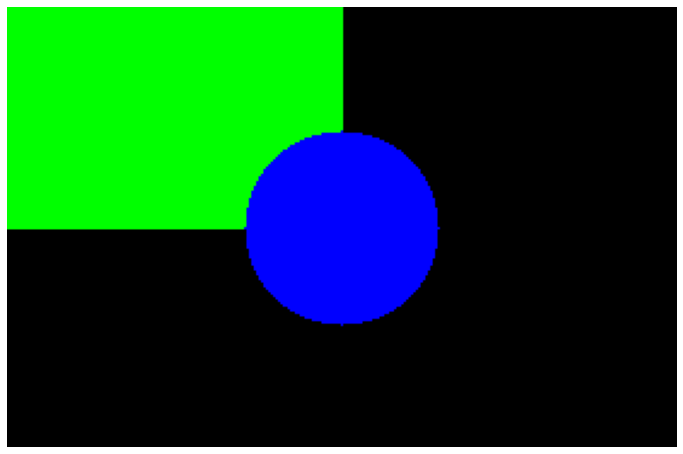

In [16]:
#draw line
line=cv.line(blank, (100,250), (300,400), (255,255,255), thickness=30)
show(line)

In [17]:
#Translation
def translate(img, x, y):
  transMat=np.float32([[1,0,x],[0,1,y]])
  dimensions=(img.shape[1], img.shape[0])
  return cv.warpAffine(img, transMat,dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

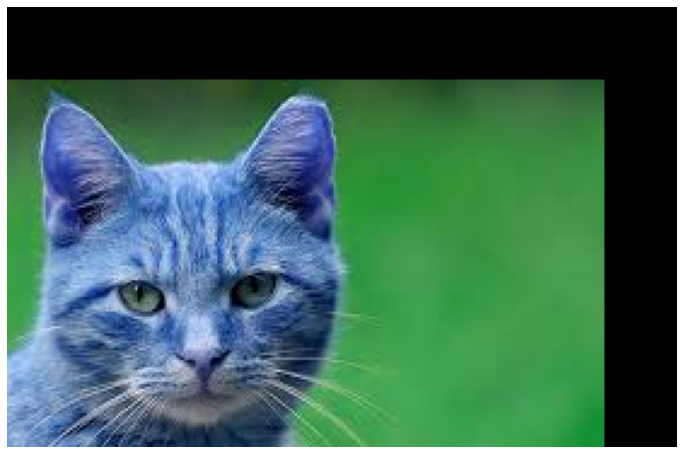

In [18]:
translated=translate(img,-30, 30)
show(translated)

In [19]:
#Rotate
def rotate(img, angle, rotPoint=None):
  (height,width)= img.shape[:2]

  if rotPoint is None:
    rotPoint = (width//2, height//2)
  
  rotMat=cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions=(width, height)

  return cv.warpAffine(img, rotMat, dimensions)

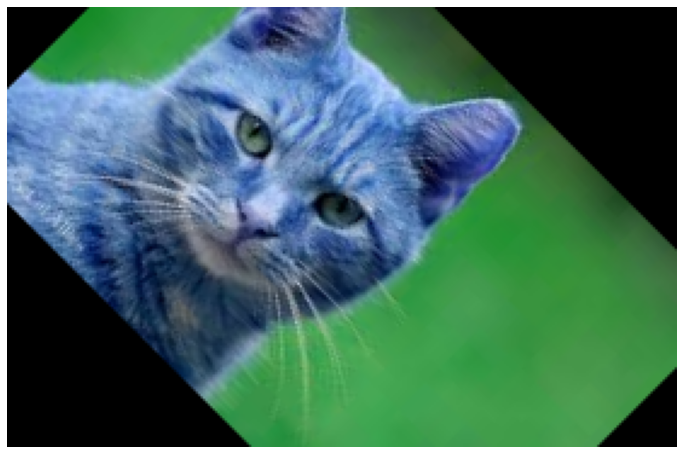

In [20]:
rotated = rotate(img, -45)
show (rotated)

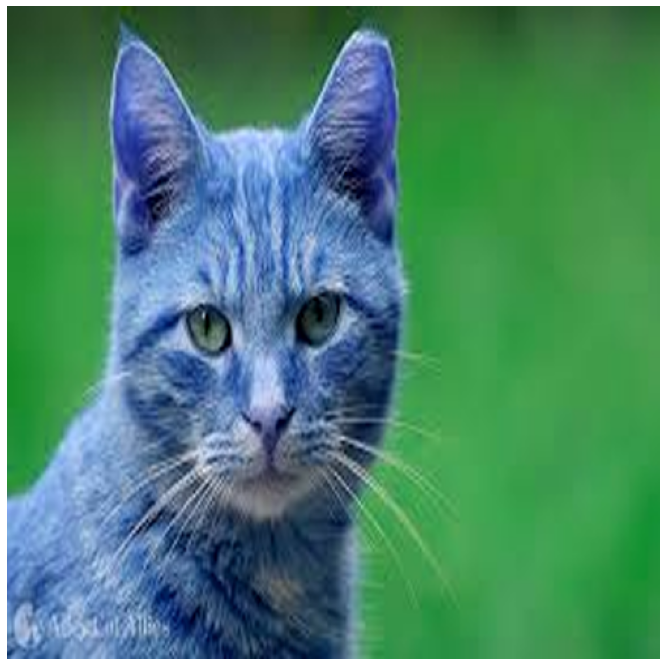

In [21]:
resize=cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)
show(resize)

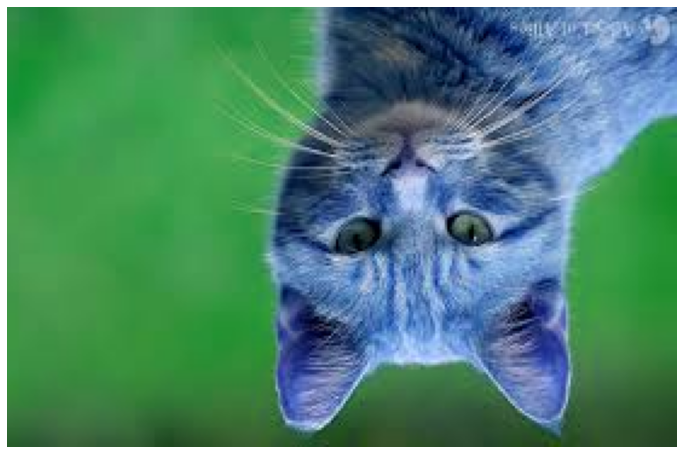

In [22]:
#flipping
flip=cv.flip(img, -1)
show(flip)

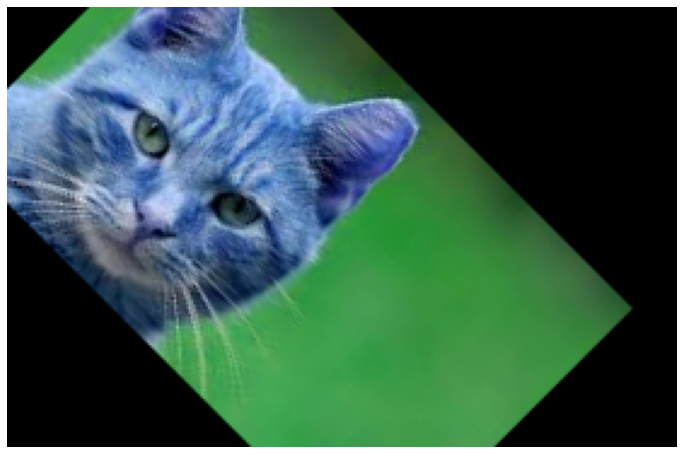

In [23]:
translated=translate(img,-30, 30)
rotated = rotate(translated, -45)
show(rotated)

In [31]:
r,g,b = cv.split(img)

red = cv.merge([r,blank,blank])
green = cv.merge([blank,g,blank])
blue = cv.merge([blank,blank,b])

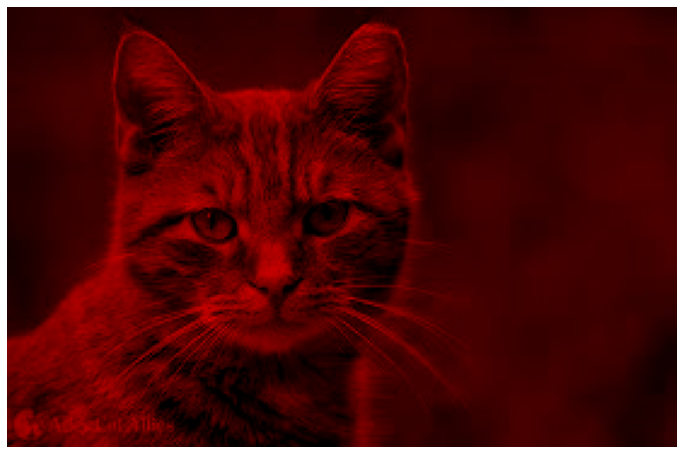

In [32]:
show(red)

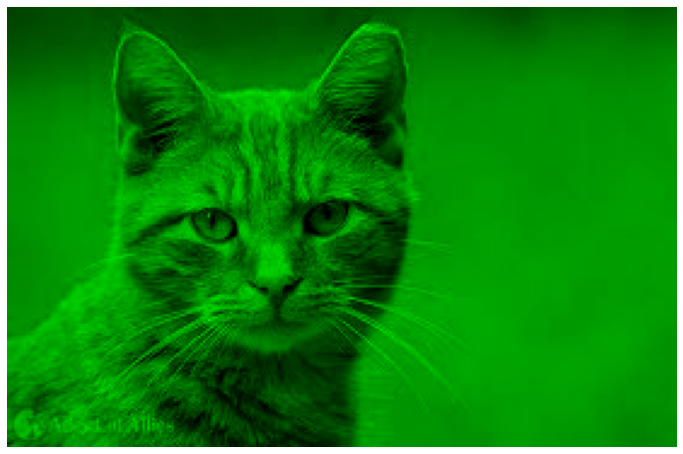

In [33]:
show(green)

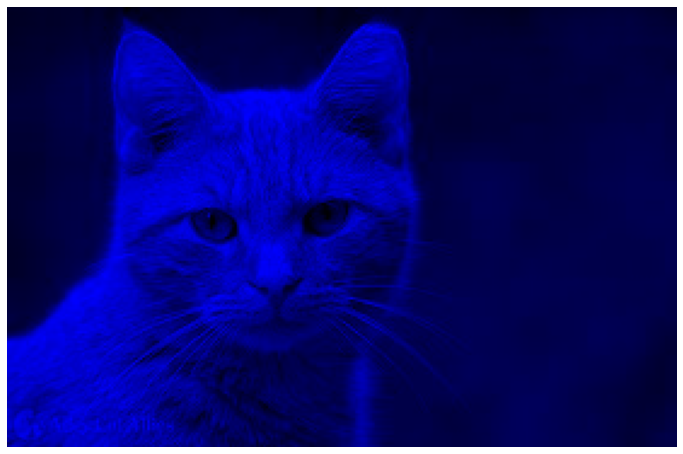

In [34]:
show(blue)

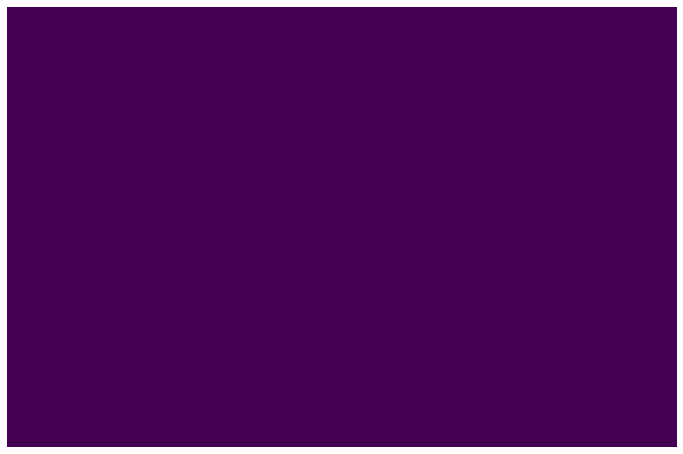

In [35]:
blank = np.zeros(img.shape[:2], dtype='uint8')
show(blank)

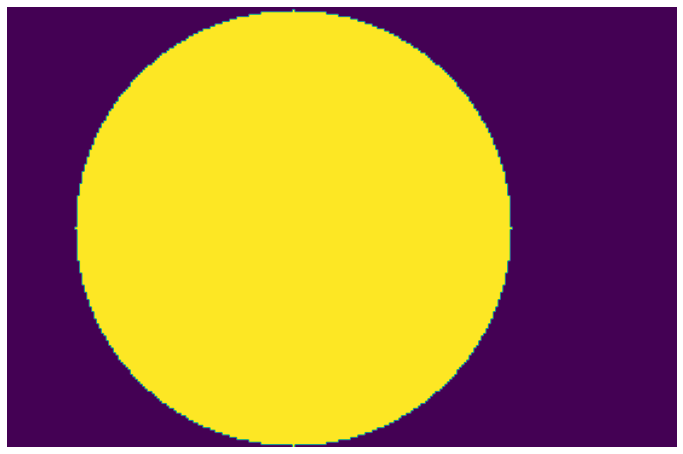

In [36]:
#circle
circle = cv.circle(blank.copy(), (img.shape[1]//2 - 20,img.shape[0]//2), 90, 255, -1)
show(circle)

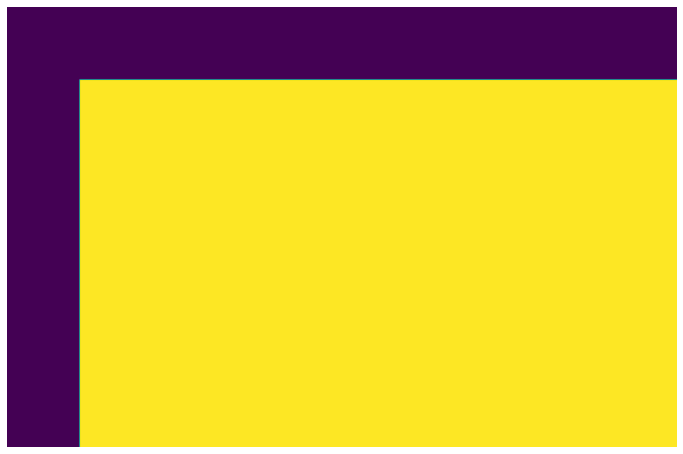

In [37]:
#rectangle
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
show(rectangle)

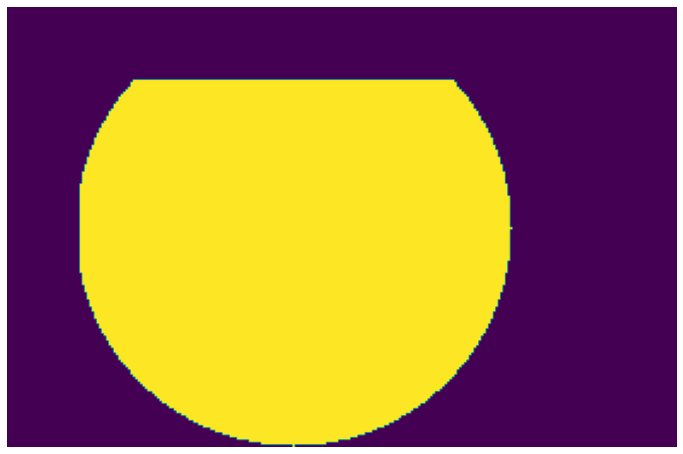

In [38]:
#bitwise_and_rectangle_circle
weird_shape = cv.bitwise_and(circle,rectangle)
show(weird_shape)

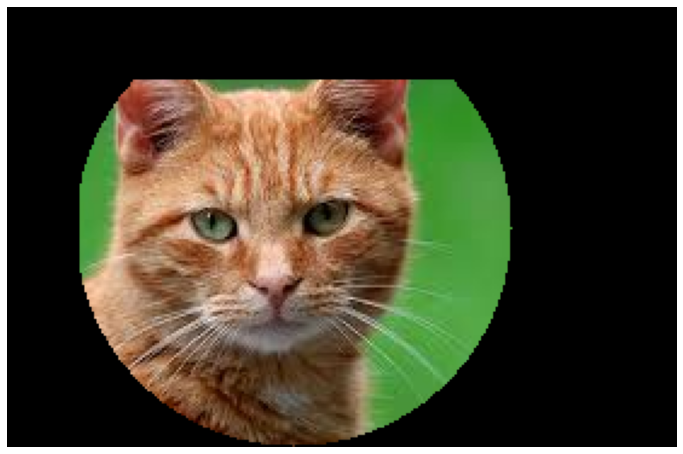

In [39]:
#masked
masked = cv.bitwise_and(original,original,mask=weird_shape)
show(masked)